
## Regresion lineal Reguralizacion Lasso y Rigde


In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [4]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline

# Modelo Regularizados



In [7]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)


## Metodo de Rigde L2
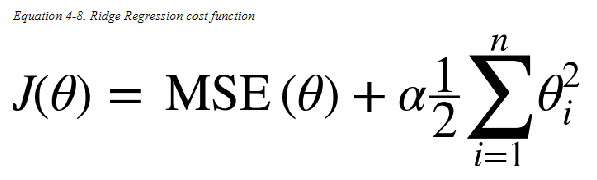

In [8]:

np.random.seed(42)
m = 20
X = 4 * np.random.rand(m, 1)
y = 2 + 1.0 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 4, 100).reshape(100, 1)


No handles with labels found to put in legend.


(0.0, 4.0, 0.0, 9.0)

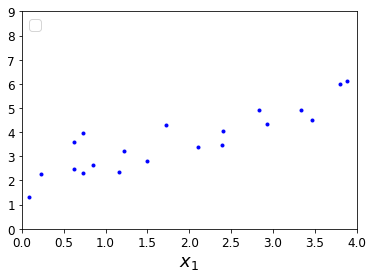

In [9]:
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left", fontsize=15)
plt.xlabel("$x_1$", fontsize=18)
plt.axis([0, 4, 0, 9])

In [10]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[3.34764983]])

(0.0, 4.0, 0.0, 9.0)

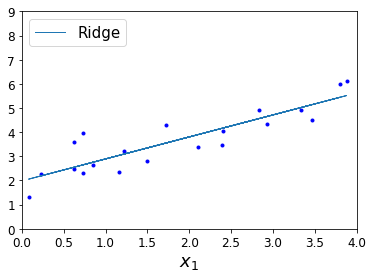

In [13]:
plt.plot(X, y, "b.", linewidth=3)
y_r= ridge_reg.predict(X)
plt.plot(X, y_r,  linewidth=1, label="Ridge")
plt.legend(loc="upper left", fontsize=15)
plt.xlabel("$x_1$", fontsize=18)
plt.axis([0, 4, 0, 9])

In [14]:
sgd_reg = SGDRegressor(max_iter=1000, tol=-np.infty, penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([3.34517459])

(0.0, 4.0, 0.0, 9.0)

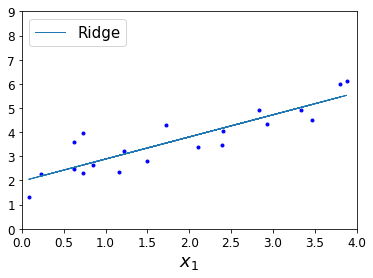

In [16]:
plt.plot(X, y, "b.", linewidth=3)
y_r=sgd_reg.
plt.plot(X, y_r,  linewidth=1, label="Ridge")
plt.legend(loc="upper left", fontsize=15)
plt.xlabel("$x_1$", fontsize=18)
plt.axis([0, 4, 0, 9])

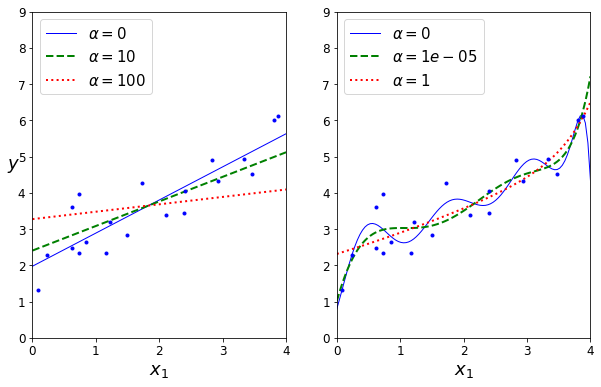

In [17]:

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", ),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 4, 0, 9])

plt.figure(figsize=(10,6))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

# Metodo de Lasso L1

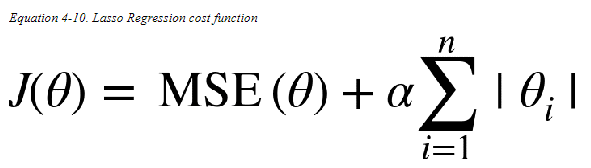

In [18]:
from sklearn.linear_model import Lasso



In [19]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

Lasso(alpha=0.1)

(0.0, 4.0, 0.0, 9.0)

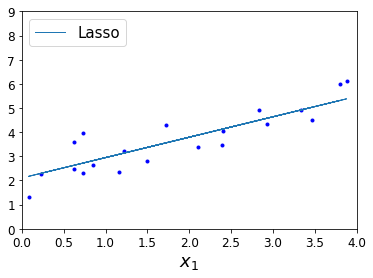

In [20]:
plt.plot(X, y, "b.", linewidth=3)
y_r=lasso_reg.predict(X)
plt.plot(X, y_r,  linewidth=1, label="Lasso")
plt.legend(loc="upper left", fontsize=15)
plt.xlabel("$x_1$", fontsize=18)
plt.axis([0, 4, 0, 9])

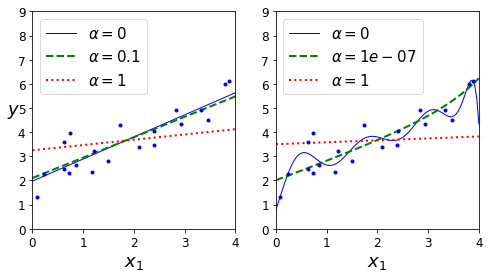

In [21]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)

plt.show()

## ElasticNet

In [22]:
from sklearn.linear_model import ElasticNet


In [23]:
elastic_net = ElasticNet(
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([3.3678635])

(0.0, 4.0, 0.0, 9.0)

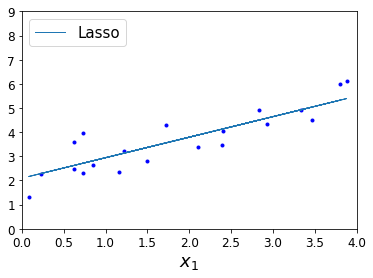

In [24]:
plt.plot(X, y, "b.", linewidth=3)
y_r=elastic_net.predict(X)
plt.plot(X, y_r,  linewidth=1, label="Elastic")
plt.legend(loc="upper left", fontsize=15)
plt.xlabel("$x_1$", fontsize=18)
plt.axis([0, 4, 0, 9])

## Early Stopping

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


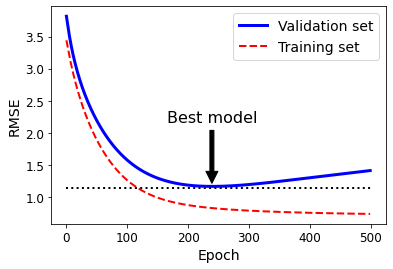

In [27]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()